In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/sumeyahussein/Desktop/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Files in dataset directory: ['fraudTrain_processed.csv', 'fraudTrain_processed2.csv', 'fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks

In [120]:
# Print the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 1296675
Number of Columns: 23


In [121]:
# Count the occurrences of each unique value in the 'is_fraud' column
print(df['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [122]:
# Show the type of data in each column
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [76]:
# Calculate the number of missing values and their percentages for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame 
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

# Filter out columns with no missing data to focus on relevant features
missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

# Check if there are any columns with missing data to visualize
if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'], palette="viridis")

    for i, (value, pct) in enumerate(zip(missing_df_filtered['Missing Data'], missing_df_filtered['Missing Percentage'])):
        ax.text(i, pct, f'{int(value)}', ha='center', va='bottom')

    # Customize plot labels and title
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis')
    ax.set_xlabel('Features with Missing Values')
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')  

    plt.show()
else:
    # If no missing data is found, print a message instead of plotting
    print("No missing data found in the dataset.")

No missing data found in the dataset.


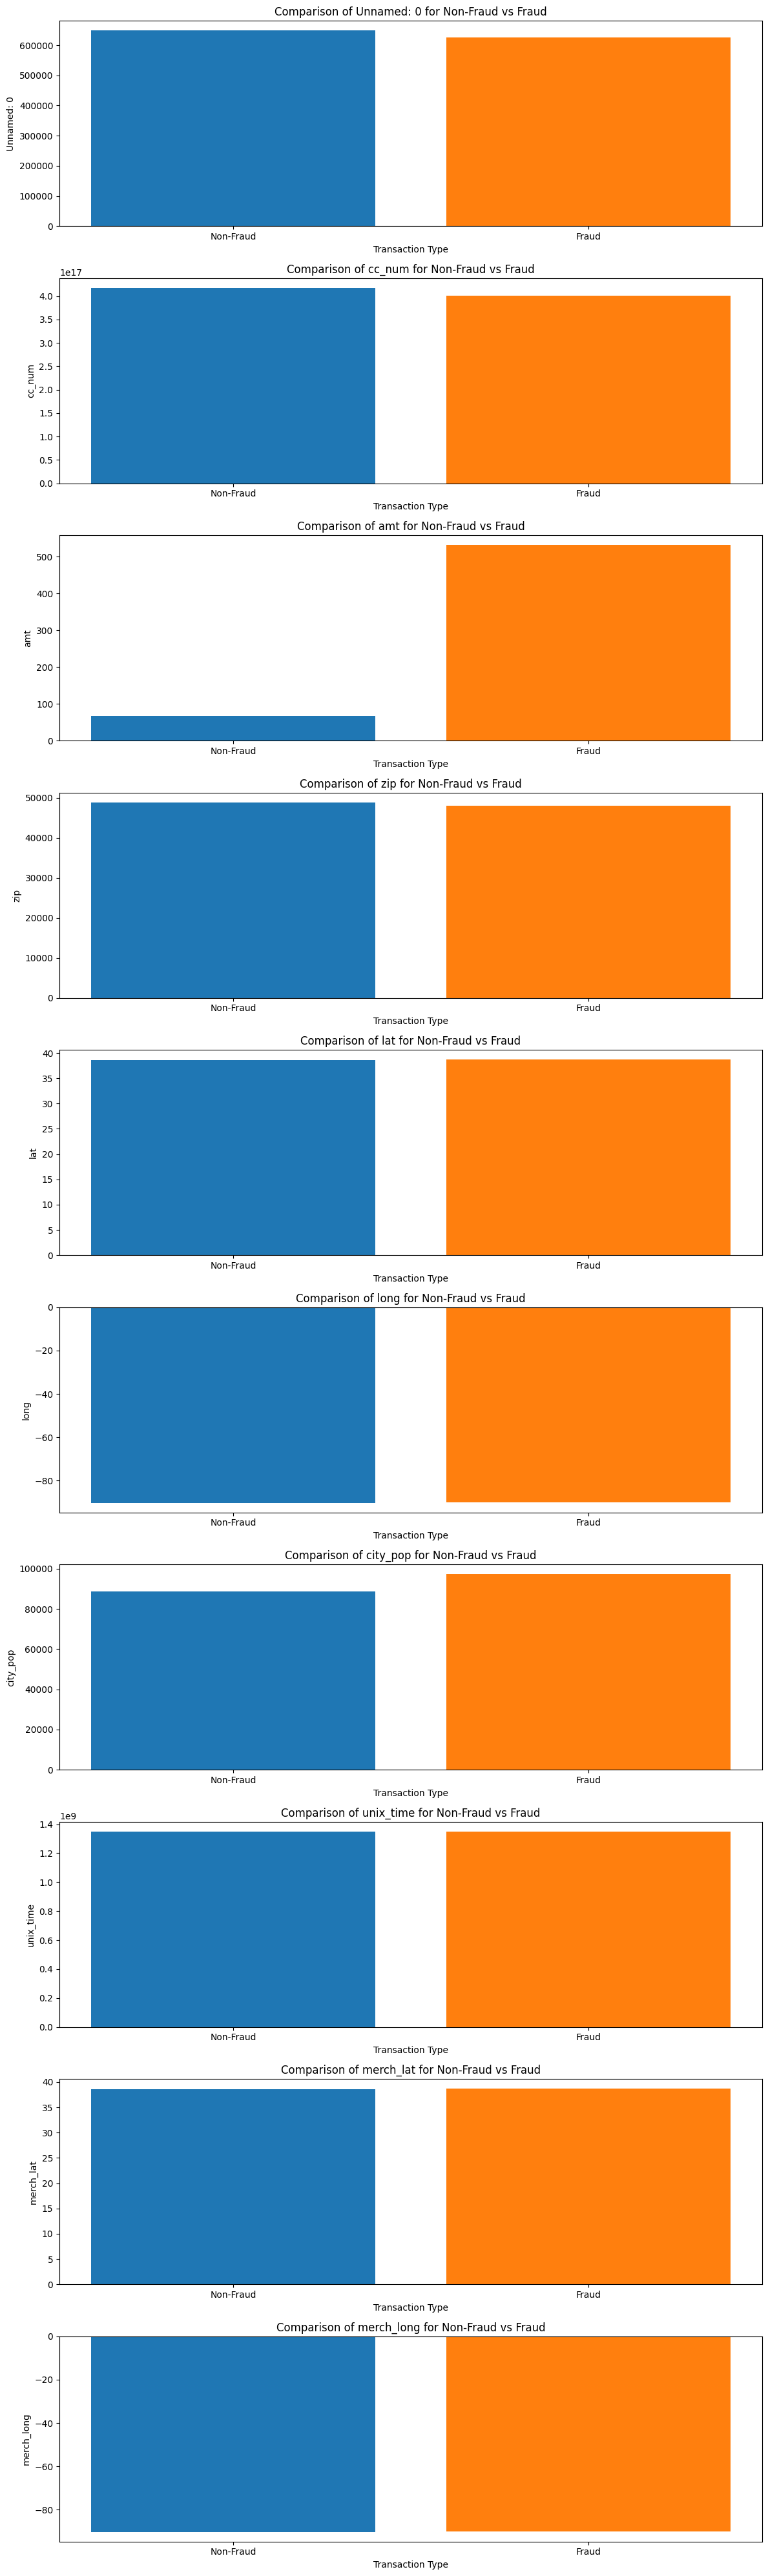

         Unnamed: 0 trans_date_trans_time            cc_num  \
2449           2449   2019-01-02 01:06:37     4613314721966   
2472           2472   2019-01-02 01:47:29   340187018810220   
2523           2523   2019-01-02 03:05:23   340187018810220   
2546           2546   2019-01-02 03:38:03     4613314721966   
2553           2553   2019-01-02 03:55:47   340187018810220   
...             ...                   ...               ...   
1295399     1295399   2020-06-21 01:00:08  3524574586339330   
1295491     1295491   2020-06-21 01:53:35  3524574586339330   
1295532     1295532   2020-06-21 02:16:56  4005676619255478   
1295666     1295666   2020-06-21 03:26:20  3560725013359375   
1295733     1295733   2020-06-21 03:59:46  4005676619255478   

                                     merchant       category      amt  \
2449                   fraud_Rutherford-Mertz    grocery_pos   281.06   
2472         fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   
2523                   f

In [123]:
# Separate the data by is_fraud values
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate means for numerical features by fraud type, looping over is_fraud
numerical_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'is_fraud']

fraud_means = fraud_df[numerical_columns].mean()
non_fraud_means = non_fraud_df[numerical_columns].mean()

# Plotting the comparisons
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    ax[i].bar(['Non-Fraud', 'Fraud'], [non_fraud_means[col], fraud_means[col]], color=['#1f77b4', '#ff7f0e'])
    ax[i].set_title(f'Comparison of {col} for Non-Fraud vs Fraud')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Transaction Type')
    
plt.tight_layout()
plt.show()

# Filter rows with is_fraud equal to 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the rows with is_fraud == 1
print(fraudulent_transactions)


In [54]:
# Check if 'is_fraud' column contains only 0 and 1
unique_values = df['is_fraud'].unique()

if set(unique_values) == {0, 1}:
    print("The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.")
else:
    print("Anomalies found in 'is_fraud' column:")
    print(f"Unexpected values: {unique_values}")


The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.


Unnamed: 0: 0 outliers found.
cc_num: 118122 outliers found.
amt: 62772 outliers found.
zip: 0 outliers found.
lat: 4636 outliers found.
long: 49624 outliers found.
city_pop: 241240 outliers found.
unix_time: 0 outliers found.
merch_lat: 4918 outliers found.
merch_long: 41728 outliers found.
Outliers in column cc_num replaced with median value: 3521417320836166.0
Outliers in column amt replaced with median value: 47.28
Outliers in column lat replaced with median value: 39.3543
Outliers in column long replaced with median value: -87.4769
Outliers in column city_pop replaced with median value: 2456.0
Outliers in column merch_lat replaced with median value: 39.365283000000005
Outliers in column merch_long replaced with median value: -87.440911
170203 rows identified as outliers using Z-score method.
Rows with Z-score outliers have been dropped.


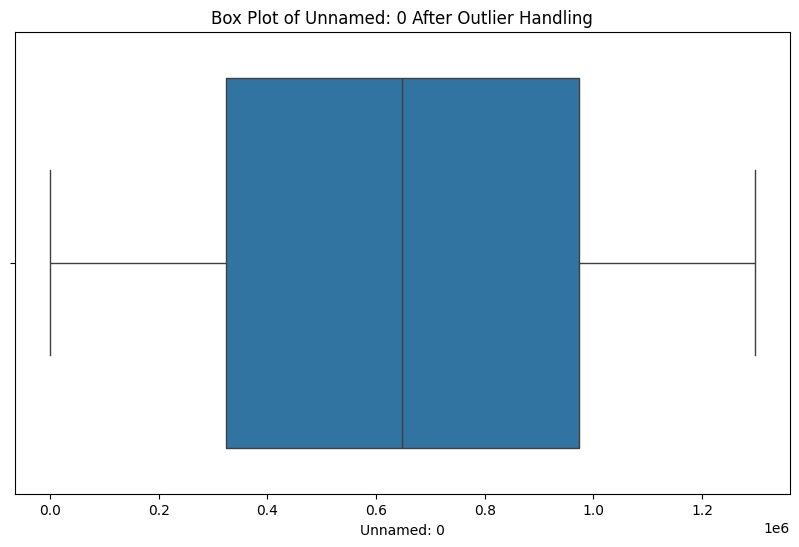

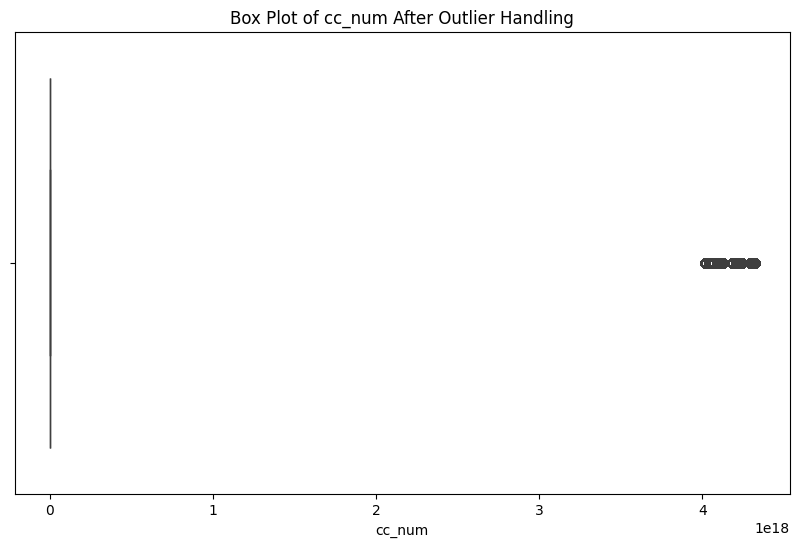

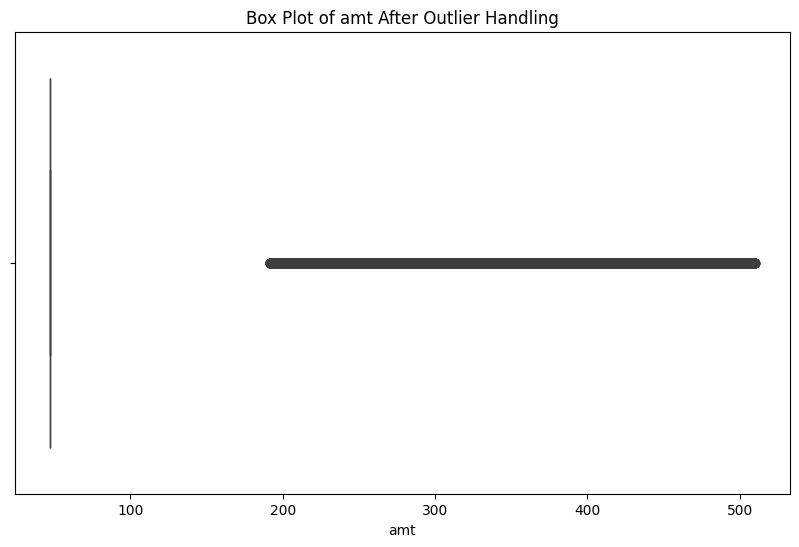

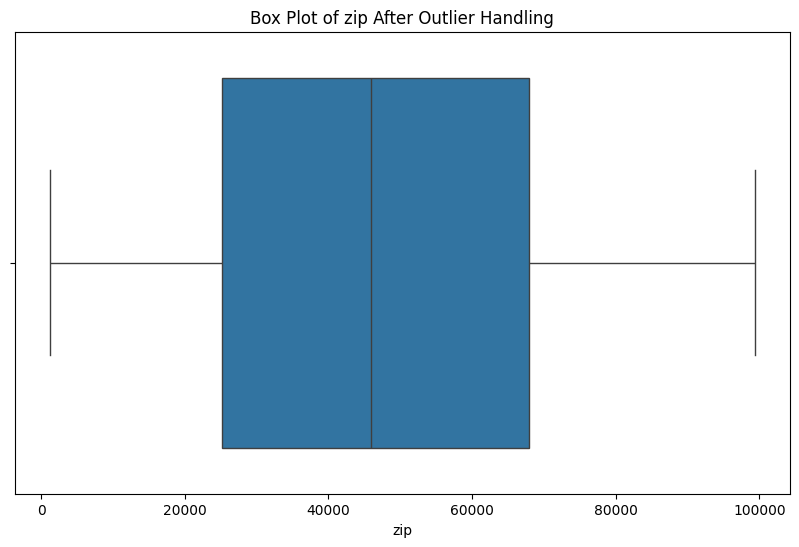

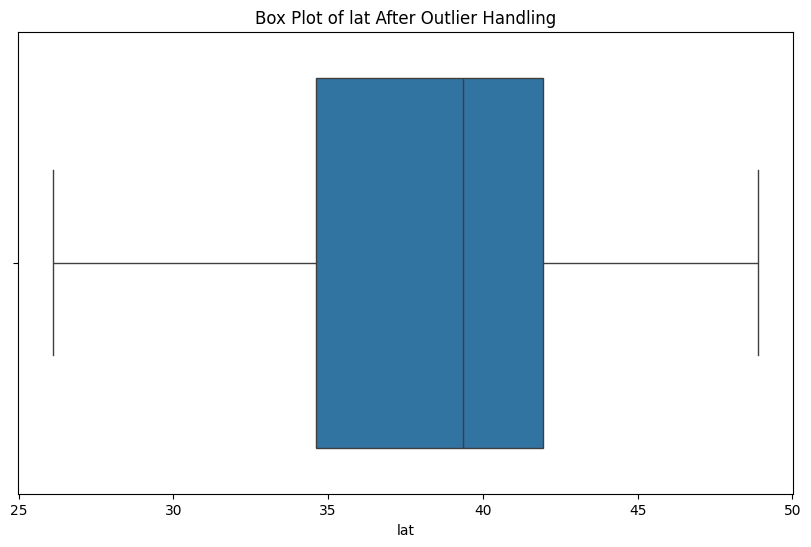

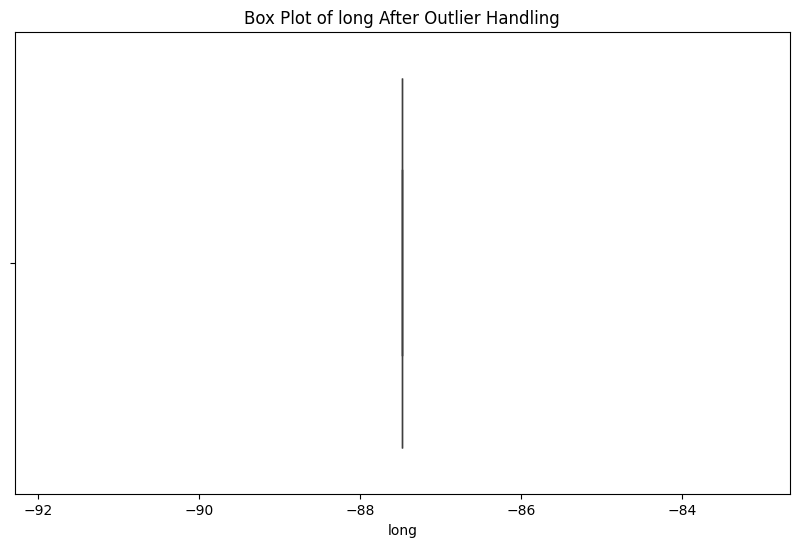

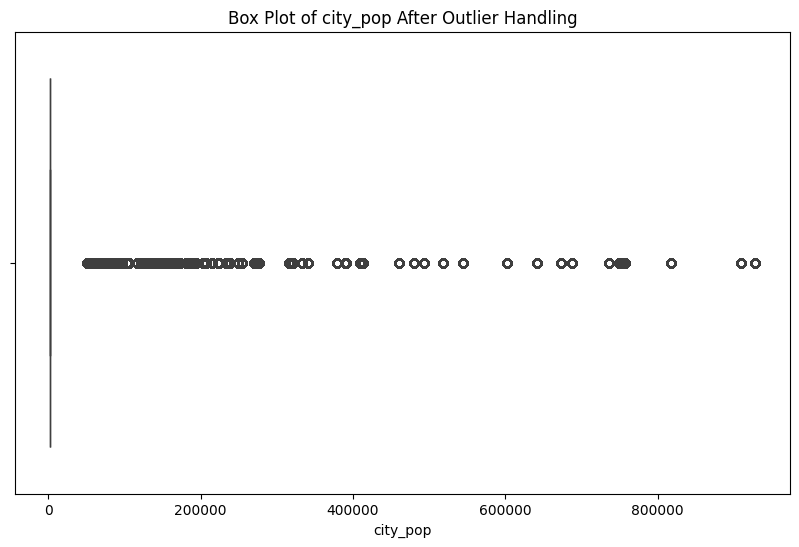

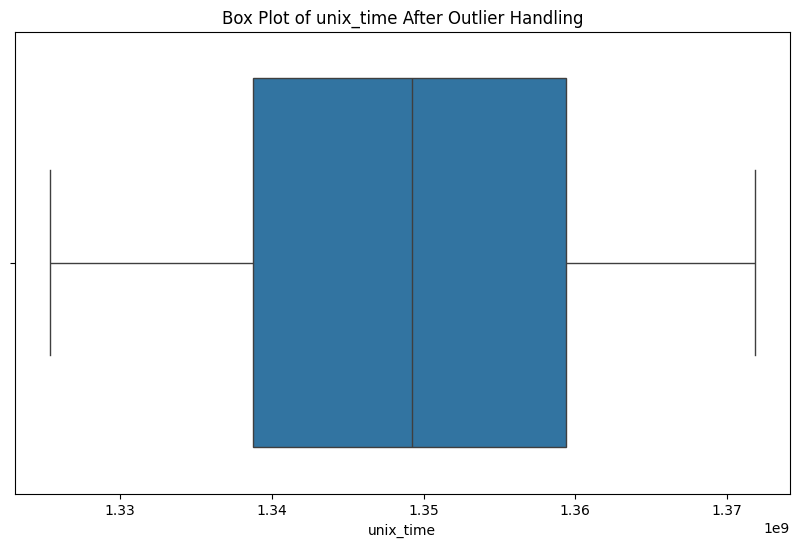

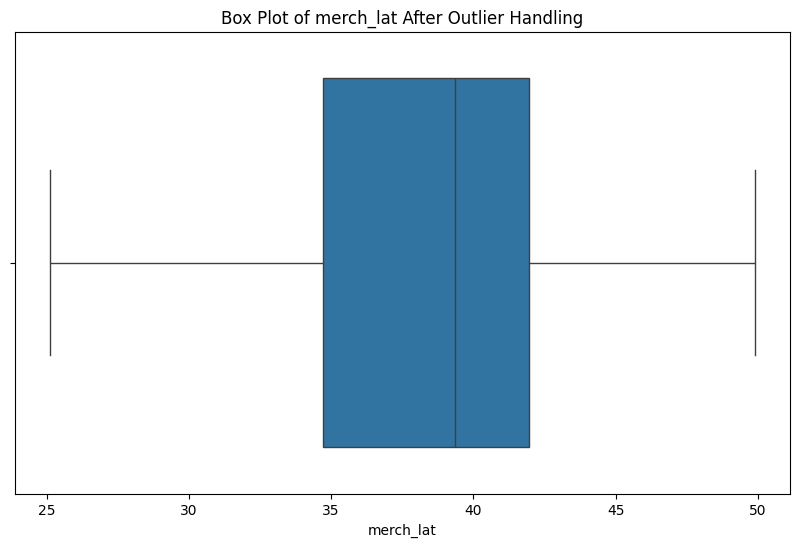

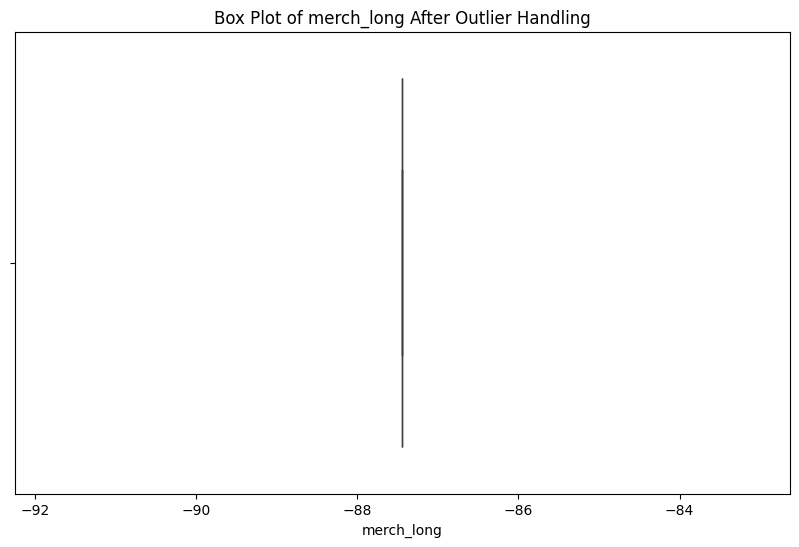

Unique values in trans_date_trans_time:
2020-06-01 01:37:47    4
2020-04-14 23:52:32    3
2019-12-22 21:00:56    3
2019-01-15 06:58:17    3
2019-12-22 02:45:37    3
                      ..
2019-07-13 20:11:45    1
2019-07-13 20:12:00    1
2019-07-13 20:13:02    1
2019-07-13 20:13:37    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1102602, dtype: int64

Unique values in merchant:
fraud_Kilback LLC                       3826
fraud_Cormier LLC                       3127
fraud_Schumm PLC                        3072
fraud_Dickinson Ltd                     2976
fraud_Kuhn LLC                          2962
                                        ... 
fraud_Boyer-Haley                        634
fraud_Little-Gleichner                   624
fraud_Reichert-Weissnat                  622
fraud_Medhurst, Labadie and Gottlieb     618
fraud_Hahn, Douglas and Schowalter       602
Name: merchant, Length: 693, dtype: int64

Unique values in category:
gas_transport     115528
home    

In [133]:
from scipy.stats import zscore

# Load your CSV file into a DataFrame
#df = pd.read_csv('/Users/sumeyahussein/Desktop/fraud/fraudTrain.csv')

# Separate the rows where is_fraud is False
df_no_fraud = df[df['is_fraud'] == 0].copy()

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df_no_fraud.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers = find_outliers_iqr(df_no_fraud, col)
        outliers_dict[col] = outliers
        print(f"{col}: {len(outliers)} outliers found.")

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        # Strategy: Replace outliers with the median
        median_value = df_no_fraud[col].median()
        df_no_fraud.loc[(df_no_fraud[col] < outliers[col].min()) | (df_no_fraud[col] > outliers[col].max()), col] = median_value
        print(f"Outliers in column {col} replaced with median value: {median_value}")

# Finding outliers with z score
z_scores = df_no_fraud[numerical_columns].apply(zscore)
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = df_no_fraud[outliers_z]

if outlier_rows.empty:
    print("No outliers found using Z-score method.")
else:
    print(f"{len(outlier_rows)} rows identified as outliers using Z-score method.")
    # Strategy: Drop rows with Z-score outliers
    df_no_fraud = df_no_fraud[~outliers_z]
    print("Rows with Z-score outliers have been dropped.")

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_no_fraud[col])
        plt.title(f"Box Plot of {col} After Outlier Handling")
        plt.show()

categorical_columns = df_no_fraud.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n{df_no_fraud[col].value_counts()}\n")

# Combine the processed rows with the rest of the DataFrame
df_combined = pd.concat([df[df['is_fraud'] == 1], df_no_fraud])

# Writing cleaned dataset, free of outliers or with outliers handled, to a CSV file
#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)
#df.to_csv("/Users/nirjalagurung/IEEE-CIS-Fraud-Detection", index=False)


In [134]:
#label encoding before feature selection
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Identify all categorical features in the dataset
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each categorical feature
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the modified categorical columns
print(df[categorical_features].head())


   trans_date_trans_time  merchant  category  first  last  gender  street  \
0                      0       514         8    162    18       0     568   
1                      1       241         4    309   157       0     435   
2                      2       390         0    115   381       1     602   
3                      3       360         2    163   463       1     930   
4                      4       297         9    336   149       1     418   

   city  state  job  dob  trans_num  
0   526     27  370  779      56438  
1   612     47  428  607     159395  
2   468     13  307  302     818703  
3    84     26  328  397     544575  
4   216     45  116  734     831111  


In [135]:
#feature selection using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the desired estimator
n_features_to_select = 10  # Specify the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Identify the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'street', 'city',
       'zip', 'city_pop', 'dob', 'trans_num', 'unix_time'],
      dtype='object')


In [136]:
#feature selection using fishers score
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Fisher's Score equivalent for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Apply Fisher's Score (ANOVA F-value)
# Select top k features; adjust k based on your needs
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the dataset
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Fisher's Score for Features:")
print(feature_scores)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top {k} Selected Features:")
print(selected_features)


Fisher's Score for Features:
                  Feature         Score
5                     amt  65576.034604
4                category    529.581979
17                    dob    191.642991
8                  gender     75.721106
19              unix_time     33.432153
1   trans_date_trans_time     29.592297
0              Unnamed: 0     29.472521
6                   first     13.435552
12                    zip      6.060474
15               city_pop      5.915552
10                   city      5.673230
13                    lat      4.651270
20              merch_lat      3.928648
11                  state      3.879209
21             merch_long      3.841981
14                   long      3.839715
9                  street      2.719460
2                  cc_num      1.249028
18              trans_num      0.839017
3                merchant      0.372986
7                    last      0.012013
16                    job      0.011285
Top 10 Selected Features:
Index(['Unnamed: 0', 'tra

In [137]:
print("\nData Types:\n", df.dtypes)



Data Types:
 Unnamed: 0                 int64
trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
first                      int64
last                       int64
gender                     int64
street                     int64
city                       int64
state                      int64
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int64
dob                        int64
trans_num                  int64
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [138]:
#dont run for now



#changing float into string for easier feature selection

# Print current data types
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

# Verify the conversion
print("\nUpdated Data Types:\n", df.dtypes)

#df.to_csv("fraudTrain_processed.csv", index=False)
#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)


Updated Data Types:
 Unnamed: 0                int64
trans_date_trans_time     int64
cc_num                    int64
merchant                  int64
category                  int64
amt                      object
first                     int64
last                      int64
gender                    int64
street                    int64
city                      int64
state                     int64
zip                       int64
lat                      object
long                     object
city_pop                  int64
job                       int64
dob                       int64
trans_num                 int64
unix_time                 int64
merch_lat                object
merch_long               object
is_fraud                  int64
dtype: object


In [139]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering
unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'gender', 'job', 'dob', 'state', 'trans_num', 'merchant']
     
# Ensure all columns exist in the DataFrame before dropping
unused_cols = [col for col in unused_cols if col in df.columns]
df.drop(columns=unused_cols, inplace=True)

# Check remaining DataFrame structure
df.info()

# Drop the original timestamp column after feature extraction
df.drop(columns=['trans_date_trans_time'], inplace=True)




# Output the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   trans_date_trans_time  1296675 non-null  int64 
 1   cc_num                 1296675 non-null  int64 
 2   category               1296675 non-null  int64 
 3   amt                    1296675 non-null  object
 4   street                 1296675 non-null  int64 
 5   city                   1296675 non-null  int64 
 6   zip                    1296675 non-null  int64 
 7   lat                    1296675 non-null  object
 8   long                   1296675 non-null  object
 9   city_pop               1296675 non-null  int64 
 10  merch_lat              1296675 non-null  object
 11  merch_long             1296675 non-null  object
 12  is_fraud               1296675 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 128.6+ MB
             cc_num  category     amt  s

In [ ]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering
#unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'gender', 'job', 'dob', 'state', 'trans_num', 'merchant']
     
# Ensure all columns exist in the DataFrame before dropping
#unused_cols = [col for col in unused_cols if col in df.columns]
#df.drop(columns=unused_cols, inplace=True)

# Check remaining DataFrame structure
#df.info()

# Drop the original timestamp column after feature extraction
#df.drop(columns=['trans_date_trans_time'], inplace=True)

# Feature Scaling for numerical columns
#scaler = StandardScaler()

#for col in df.columns:#scale_cols:
    #df[col] = scaler.fit_transform(df[[col]])


# Output the first few rows
#print(df.head())

# Write to a new CSV file (optional)
# Uncomment the line below to save the processed DataFrame to a CSV file
#df.to_csv("fraudTrain_processed.csv", index=False)

#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   cc_num      1296675 non-null  object
 1   category    1296675 non-null  object
 2   amt         1296675 non-null  object
 3   street      1296675 non-null  object
 4   city        1296675 non-null  object
 5   zip         1296675 non-null  object
 6   lat         1296675 non-null  object
 7   long        1296675 non-null  object
 8   city_pop    1296675 non-null  object
 9   merch_lat   1296675 non-null  object
 10  merch_long  1296675 non-null  object
 11  is_fraud    1296675 non-null  object
dtypes: object(12)
memory usage: 118.7+ MB


KeyError: "['trans_date_trans_time'] not found in axis"

In [140]:
print("\n Data Types:\n", df.dtypes)



 Data Types:
 cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
is_fraud       int64
dtype: object


In [141]:

from sklearn.model_selection import train_test_split



X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print(X_train.dtypes)
print(X_test.dtypes)

Training set size: (1037340, 11)
Test set size: (259335, 11)
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object


In [142]:
print("\ncheckign Data Types:\n", df.dtypes)



checkign Data Types:
 cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
is_fraud       int64
dtype: object


In [143]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Training Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_dt)  # Calculate AUC

# Printing metrics
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1 Score:", f1)
print("Decision Tree AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9958509264079279
Decision Tree Precision: 0.9958892073222622
Decision Tree Recall: 0.9958509264079279
Decision Tree F1 Score: 0.9958697469403663
Decision Tree AUC: 0.8265610438737692

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.64      0.66      0.65      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.83      0.82    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257263    552]
 [   524    996]]


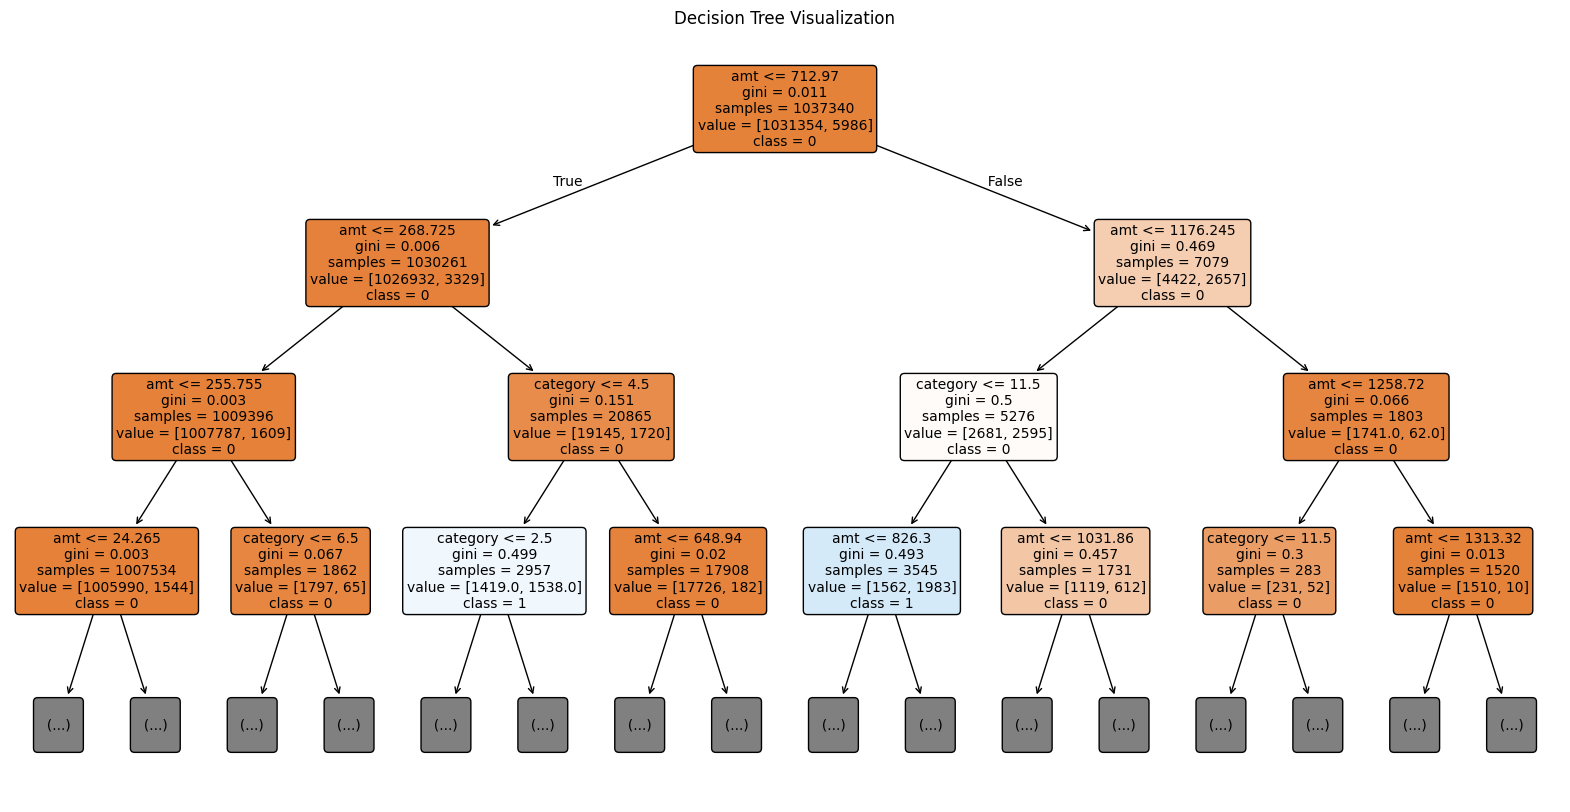

In [144]:
# add visulizations 

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# visualization plot
plt.figure(figsize=(20, 10))  # Set figure size for clarity
plot_tree(
    dt_model,
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,  
    rounded=True,  
    fontsize=10, 
    max_depth=3 # Limiting the depth for better readability 
)
plt.title("Decision Tree Visualization")
plt.show()

In [145]:
#  K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Scaling the data for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_knn)  # Calculate AUC

# Print metrics
print("K-Nearest Neighbors Accuracy:", accuracy)
print("K-Nearest Neighbors Precision:", precision)
print("K-Nearest Neighbors Recall:", recall)
print("K-Nearest Neighbors F1 Score:", f1)
print("K-Nearest Neighbors AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.9957236778683941
K-Nearest Neighbors Precision: 0.9951150332867205
K-Nearest Neighbors Recall: 0.9957236778683941
K-Nearest Neighbors F1 Score: 0.9952463412222257
K-Nearest Neighbors AUC: 0.8854059405612144

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.71      0.45      0.55      1520

    accuracy                           1.00    259335
   macro avg       0.86      0.73      0.78    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257539    276]
 [   833    687]]


In [146]:
#  Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Scaling the data for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_lr)  # Calculate AUC

# Print metrics
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1 Score:", f1)
print("Logistic Regression AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.993587444810766
Logistic Regression Precision: 0.9883088485905724
Logistic Regression Recall: 0.993587444810766
Logistic Regression F1 Score: 0.9909411171759285
Logistic Regression AUC: 0.8349918393135836

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[257672    143]
 [  1520      0]]


In [147]:
# Naive Bayes​
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Scaling the data for Naive Bayes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_nb)  # Calculate AUC

# Print metrics
print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1 Score:", f1)
print("Naive Bayes AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9872944261283668
Naive Bayes Precision: 0.9924384312204221
Naive Bayes Recall: 0.9872944261283668
Naive Bayes F1 Score: 0.9895795981909079
Naive Bayes AUC: 0.8476524833698582

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.23      0.49      0.31      1520

    accuracy                           0.99    259335
   macro avg       0.61      0.74      0.65    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[255301   2514]
 [   781    739]]


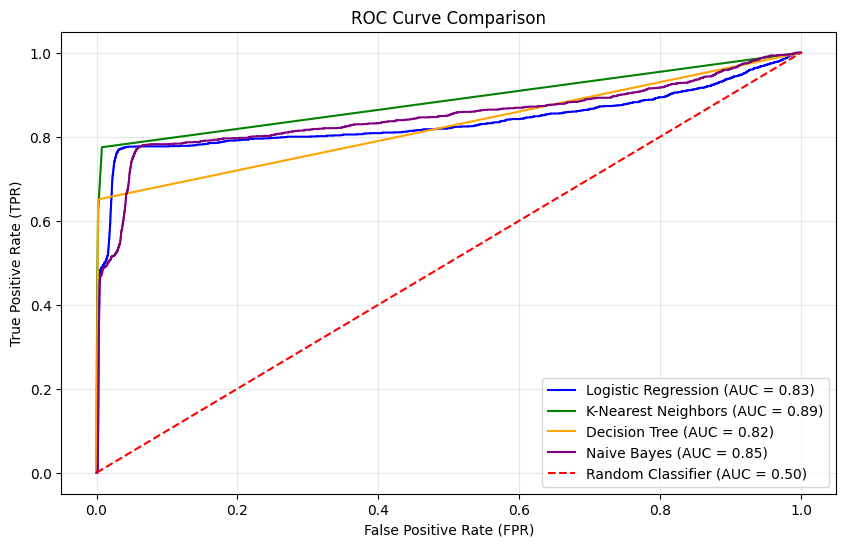

In [148]:
# comparing model viz. ROC curve 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier(random_state=42)
naive_bayes_model = GaussianNB()

# Train models
logistic_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
naive_bayes_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_test_probs_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_dt = decision_tree_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_nb = naive_bayes_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_probs_lr)
auc_lr = roc_auc_score(y_test, y_test_probs_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_probs_knn)
auc_knn = roc_auc_score(y_test, y_test_probs_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_probs_dt)
auc_dt = roc_auc_score(y_test, y_test_probs_dt)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_probs_nb)
auc_nb = roc_auc_score(y_test, y_test_probs_nb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})", color='green')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='orange')
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='purple')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier (AUC = 0.50)")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/var/folders/rk/02lv3n194nx0yl4xns9sbnw40000gn/T/ipykernel_44549/1023528143.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y=scoring, data=cv_df_melted, palette="Set2")


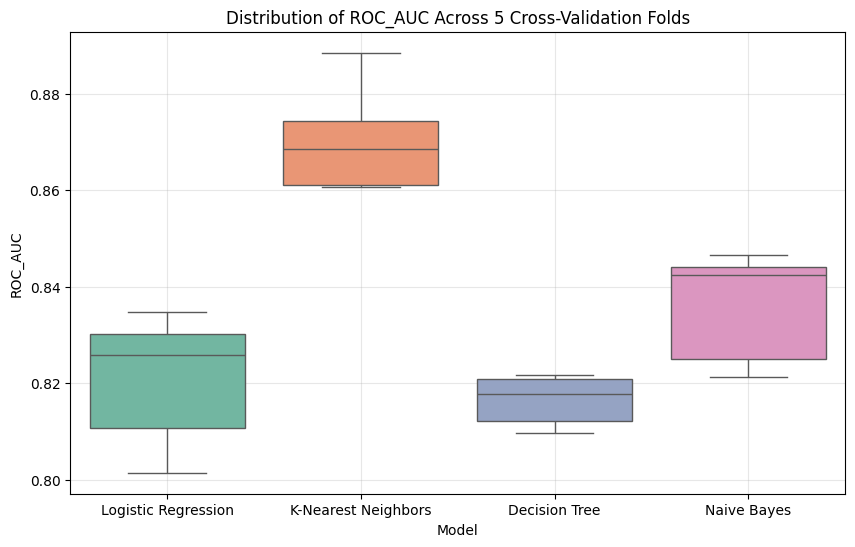

In [149]:
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import pandas as pd

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Metric to evaluate
scoring = "roc_auc"  # Change to 'accuracy', 'f1', etc., for other metrics

# Collect scores
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, scaler.fit_transform(X_train), y_train, cv=5, scoring=scoring)
    cv_results[name] = scores

# Prepare DataFrame for plotting
cv_df = pd.DataFrame(cv_results)
cv_df_melted = cv_df.melt(var_name="Model", value_name=scoring)

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y=scoring, data=cv_df_melted, palette="Set2")
plt.title(f"Distribution of {scoring.upper()} Across 5 Cross-Validation Folds")
plt.ylabel(scoring.upper())
plt.xlabel("Model")
plt.grid(alpha=0.3)
plt.show()


In [196]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    scoring='f1_weighted',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)

# Best model
best_dt_model = dt_grid_search.best_estimator_
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [199]:
from sklearn.model_selection import GridSearchCV
#initializing decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
# Define the parameter grid
param_grid_dt = {
    'max_depth':[3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV with F1-score as the scoring metric
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearch to the training data
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best estimator and parameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_
print(f"Best Parameters for Decision Tree: {best_dt_params}")

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [201]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
# Fit GridSearch to the training data
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best estimator and parameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
print(f"Best Parameters for K-Nearest Neighbors Tree: {best_knn_params}")
    

Best Parameters for K-Nearest Neighbors Tree: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [203]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': [None],  # Change 'none' to None
    'max_iter': [1000, 2000],
    'tol': [1e-4, 1e-3]
}
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
# Fit GridSearch to the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best estimator and parameters
best_lr_model = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_
print(f"Best Parameters for Logistic Regression: {best_lr_params}")
    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=No

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': None, 'tol': 0.0001}


In [204]:
# Naive Bayes
# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='f1', n_jobs=-1)
# Fit GridSearch to the training data
grid_search_nb.fit(X_train_scaled, y_train)

# Get the best estimator and parameters
best_nb_model = grid_search_nb.best_estimator_
best_nb_params = grid_search_nb.best_params_
print(f"Best Parameters for Naive Bayes: {best_nb_params}")


Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
